# Titanic Survivor Prediction Notebook

### 1. Data Preparation

In [83]:
# import relevant packages
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [84]:
# change working directory and load data
path = r"/Users/jonasschroeder/OneDrive - MTP-Marketing zwischen Theorie und Praxis e. V/Python/Kaggle/Titanic Competition"
os.chdir(path)

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [85]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
# TRAINING DATA

# Rename class
train_df["Pclass"].replace(1, "Upper", inplace=True)
train_df["Pclass"].replace(2, "Middle", inplace=True)
train_df["Pclass"].replace(3, "Lower", inplace=True)

# Replace missing age with median
train_df["Age"].fillna(np.nanmedian(train_df["Age"]), inplace=True)

# Create Age Bands

# With family 
train_df["with_family"] = (train_df["SibSp"] + train_df["Parch"])>0

# Replace NA for embarked with "S"
train_df["Embarked"].fillna("S", inplace=True)

# Replace NA for Cabin with "Unknown"
train_df["Cabin"].fillna("Unknown", inplace=True)

# Extract Name Title
train_df["Title"] = train_df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
title_list = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Col"]
train_df.loc[~train_df["Title"].isin(title_list), "Title"] = "NA"

# Extract deck from Cabin
for i in range(0, len(train_df)):
    train_df.at[i, "Deck"] = " ".join(re.findall("[a-zA-Z]+", train_df.at[i, "Cabin"]))

train_df["Deck"].replace("B B", "B", inplace=True)
train_df["Deck"].replace("B B B", "B", inplace=True)
train_df["Deck"].replace("B B B B", "B", inplace=True)
train_df["Deck"].replace("C C", "C", inplace=True)
train_df["Deck"].replace("D D", "D", inplace=True)
train_df["Deck"].replace("C C C", "C", inplace=True)
train_df["Deck"].replace("F G", "F", inplace=True)
train_df["Deck"].replace("F E", "E", inplace=True)
train_df["Deck"].replace("T", "Unknown", inplace=True)

In [88]:
# TEST DATA

# Rename class
test_df["Pclass"].replace(1, "Upper", inplace=True)
test_df["Pclass"].replace(2, "Middle", inplace=True)
test_df["Pclass"].replace(3, "Lower", inplace=True)

# Replace missing age with median
test_df["Age"].fillna(np.nanmedian(test_df["Age"]), inplace=True)

# Replace missing fare with median
test_df["Fare"].fillna(np.nanmedian(test_df["Fare"]), inplace=True)

# Replace NA for embarked with "S"
test_df["Embarked"].fillna("S", inplace=True)

# Replace NA for Cabin with "Unknown"
test_df["Cabin"].fillna("Unknown", inplace=True)

# With family
test_df["with_family"] = (test_df["SibSp"] + test_df["Parch"])>0

# Extract Name Title
test_df["Title"] = test_df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
title_list = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Col"]
test_df.loc[~test_df["Title"].isin(title_list), "Title"] = "NA"

# Extract deck from Cabin
for i in range(0, len(test_df)):
    test_df.at[i, "Deck"] = " ".join(re.findall("[a-zA-Z]+", test_df.at[i, "Cabin"]))

test_df["Deck"].replace("B B", "B", inplace=True)
test_df["Deck"].replace("B B B", "B", inplace=True)
test_df["Deck"].replace("B B B B", "B", inplace=True)
test_df["Deck"].replace("C C", "C", inplace=True)
test_df["Deck"].replace("E E", "E", inplace=True)
test_df["Deck"].replace("D D", "D", inplace=True)
test_df["Deck"].replace("C C C", "C", inplace=True)
test_df["Deck"].replace("F G", "F", inplace=True)
test_df["Deck"].replace("F E", "E", inplace=True)
test_df["Deck"].replace("T", "Unknown", inplace=True)

In [89]:
# detect attributes with missing values
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  with_family  891 non-null    bool   
 13  Title        891 non-null    object 
 14  Deck         891 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usage: 98.4+ KB
None


In [90]:
# detect attributes with missing values
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  with_family  418 non-null    bool   
 12  Title        418 non-null    object 
 13  Deck         418 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 43.0+ KB
None


In [91]:
# Pre-processing: Standardization and One-Hot Encoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_df_pre = train_df.drop(columns=["Name", "Ticket", "Cabin"])
test_df_pre = test_df.drop(columns=[ "Name", "Ticket", "Cabin"])

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Embarked", "Deck", "Sex", "Title", "with_family"]

col_transformer = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ],
    remainder="passthrough")

# Fit transform TRAIN
train_array_transformed = col_transformer.fit_transform(train_df_pre)

# Convert numpy.ndarray to pd.DataFrame
train_df_transformed = pd.DataFrame(data=train_array_transformed)
#train_df_transformed = pd.DataFrame(data=train_array_transformed.toarray())

# Rename columns
column_names = num_attribs + list(col_transformer.named_transformers_['cat'].get_feature_names()) + ["PassengerId"] + ["Survived"]
train_df_transformed.columns = column_names


# Fit transform TEST
test_array_transformed = col_transformer.fit_transform(test_df_pre)

# Convert numpy.ndarray to pd.DataFrame
test_df_transformed = pd.DataFrame(data=test_array_transformed)

# Rename columns
column_names = num_attribs + list(col_transformer.named_transformers_['cat'].get_feature_names()) + ["PassengerId"]
test_df_transformed.columns = column_names

In [92]:
# check columns
print(train_df_transformed.columns)
print(test_df_transformed.columns)

Index(['Age', 'SibSp', 'Parch', 'Fare', 'x0_Lower', 'x0_Middle', 'x0_Upper',
       'x1_C', 'x1_Q', 'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F',
       'x2_G', 'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr',
       'x4_Master', 'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev',
       'x5_False', 'x5_True', 'PassengerId', 'Survived'],
      dtype='object')
Index(['Age', 'SibSp', 'Parch', 'Fare', 'x0_Lower', 'x0_Middle', 'x0_Upper',
       'x1_C', 'x1_Q', 'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F',
       'x2_G', 'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr',
       'x4_Master', 'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev',
       'x5_False', 'x5_True', 'PassengerId'],
      dtype='object')


## 2. Exploratory Data Analysis

Note: The subsequent plots are based on the pre-processed data above. Decisions regarding the imputation (missing values for age, cabin, fare, etc.) directly influence the plots.

In [93]:
# summary statistics
train_df[["Survived", "Age", "SibSp", "Parch", "Fare"]].describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,0.523008,0.381594,32.204208
std,0.486592,13.019697,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


### General Distribution of Features

Text(0.5, 1.0, 'Number of Survivors')

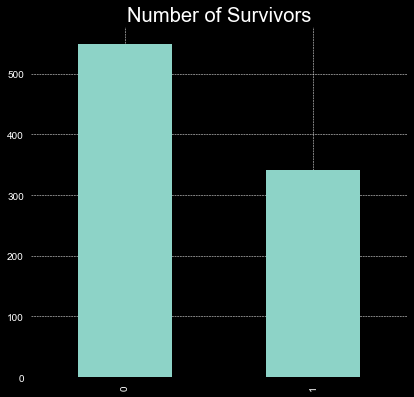

In [94]:
# Survived
plt.figure(figsize=(6,6))
count_survived = train_df["Survived"].value_counts()
count_survived .plot.bar()
plt.title("Number of Survivors")

Text(0.5, 1.0, 'Number per Class')

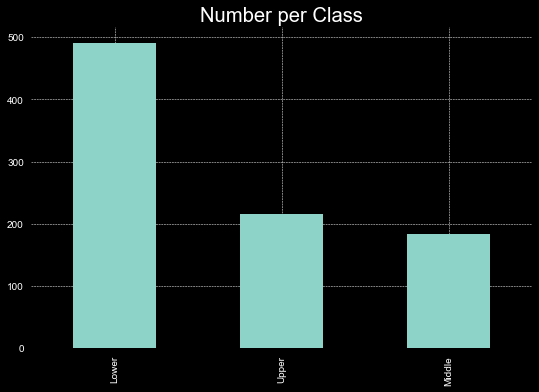

In [95]:
# Number per class
count_class = train_df["Pclass"].value_counts()
count_class.plot.bar()
plt.title("Number per Class")

Text(0.5, 1.0, 'Number per Title')

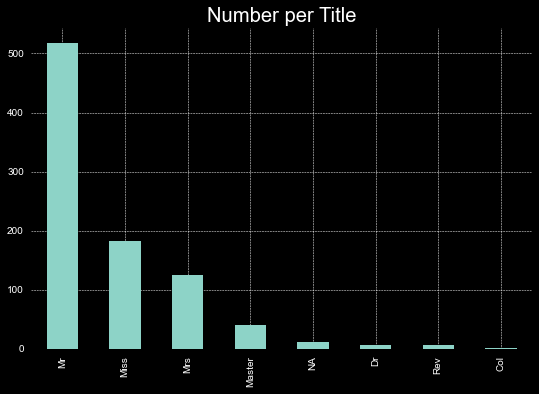

In [96]:
# Number per Title
count_title = train_df["Title"].value_counts()
count_title.plot.bar()
plt.title("Number per Title")

Text(0.5, 1.0, 'Number of Siblings or Spouses')

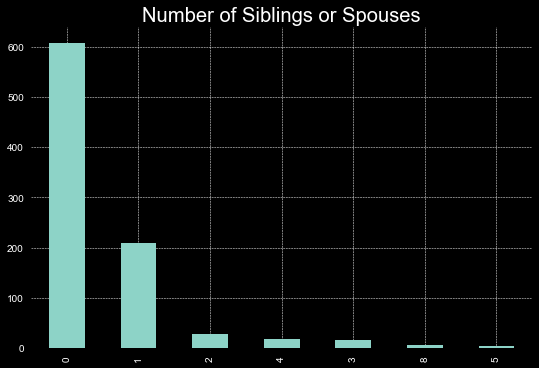

In [97]:
# Number of siblings or spouses
count_sibsp = train_df["SibSp"].value_counts()
count_sibsp.plot.bar()
plt.title("Number of Siblings or Spouses")

Text(0.5, 1.0, 'Number per Port')

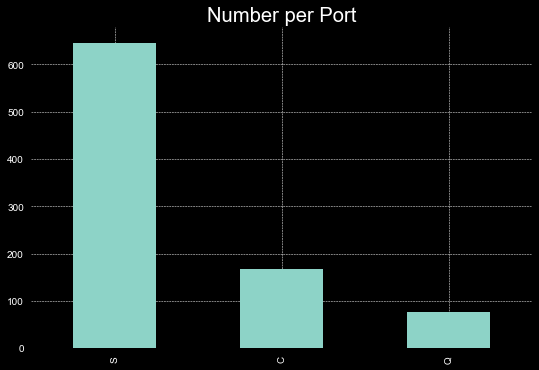

In [98]:
# Number per port
count_port = train_df["Embarked"].value_counts()
count_port.plot.bar()
plt.title("Number per Port")

Text(0.5, 1.0, 'Number per Deck')

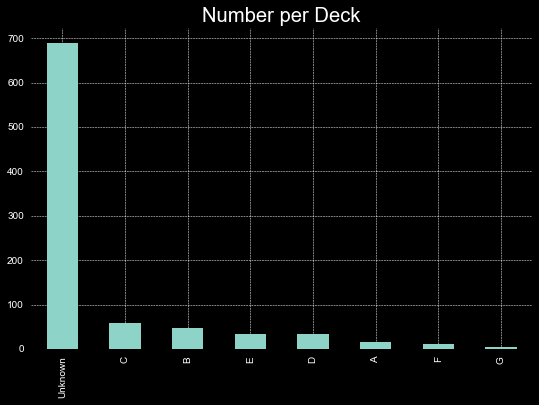

In [99]:
# Number per deck
count_deck = train_df["Deck"].value_counts()
count_deck.plot.bar()
plt.title("Number per Deck")

Text(0.5, 1.0, 'Number per with_family')

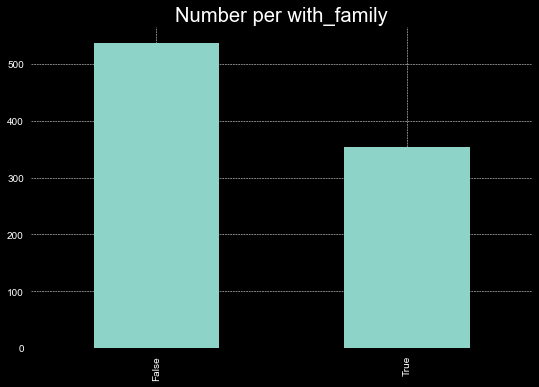

In [100]:
# Number per with_family

count_with_family = train_df["with_family"].value_counts()
count_with_family.plot.bar()
plt.title("Number per with_family")

<AxesSubplot:>

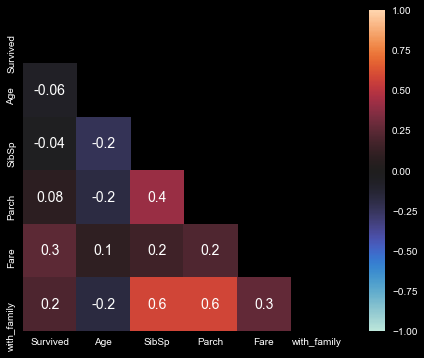

In [101]:
# correlation between all numeric attributes
matrix = np.triu(train_df.drop(columns=["PassengerId"]).corr())
sns.heatmap(train_df.drop(columns=["PassengerId"]).corr(), annot=True, fmt=".1g", 
            vmin=-1, vmax=1, center=0, 
            cmap="icefire", square=True, mask=matrix)

Text(0.5, 0.98, 'Characteristics of Survivors vs Non-Survivors')

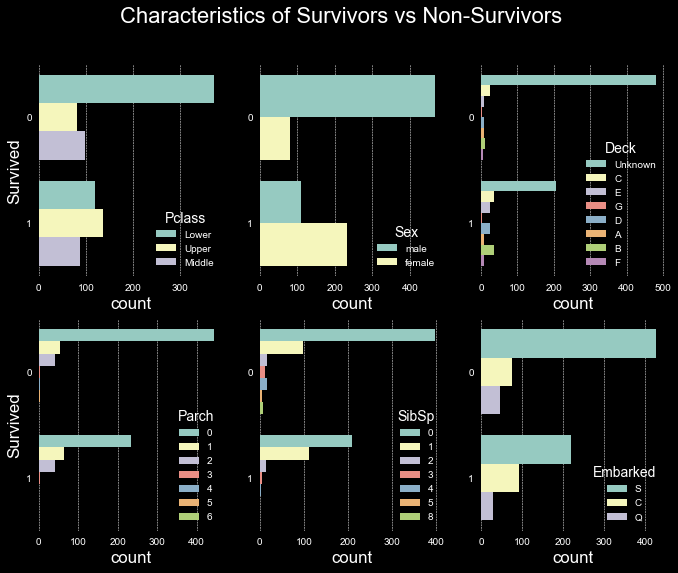

In [102]:
# Survival countplots all in one
fig, axs = plt.subplots(2, 3, figsize=(10,8))
sns.countplot(data=train_df, y="Survived", hue="Pclass", ax=axs.flatten()[0])
axs.flatten()[0].legend(title="Pclass", loc=4)
sns.countplot(data=train_df, y="Survived", hue="Sex", ax=axs.flatten()[1])
axs.flatten()[1].legend(title="Sex", loc=4)
axs.flatten()[1].set_ylabel('') 
sns.countplot(data=train_df, y="Survived", hue="Deck", ax=axs.flatten()[2])
axs.flatten()[2].set_ylabel('') 
axs.flatten()[2].legend(title="Deck", loc=4)
sns.countplot(data=train_df, y="Survived", hue="Parch", ax=axs.flatten()[3])
axs.flatten()[3].legend(title="Parch", loc=4)
sns.countplot(data=train_df, y="Survived", hue="SibSp", ax=axs.flatten()[4])
axs.flatten()[4].set_ylabel('') 
axs.flatten()[4].legend(title="SibSp", loc=4)
sns.countplot(data=train_df, y="Survived", hue="Embarked", ax=axs.flatten()[5])
axs.flatten()[5].set_ylabel('') 
axs.flatten()[5].legend(title="Embarked", loc=4)
fig.suptitle("Characteristics of Survivors vs Non-Survivors", size=22)